# Machine_Learning_Project

# The project is made for ISE in RIT Final Year CSE Department

The name of project is Sales Prediction from Social Network Ads. For this project we use Social Network Ads dataset from Kaggle website : https://www.kaggle.com/rakeshrau/social-network-ads

The dataset provides a categorical dataset to determine whether a user purchased a particular product.

Problem Statement : The objective of this analysis is to predict whether a person will buy a product displayed on a social network ad or not, given their age, gender and salary and to compare the accuracy of different classification algorithms.

Methodology: We have create an Exploratory Data Analysis and split it into three parts and also create a Model.ipynb file in which we did training on dataset and check which classifier among Random Forest Classifier, Logistic Regression, Support Vector Classifier and Gaussian Navive Bayes Classifier can give better results.

Conclusion : The product seem to be intended for people within the range of 50 - 60 years, and it also seems to be intended both for male and Female gender. As we saw on the Age vs Salary plots, it seems that the women analyzed have higher income than men, so this might be a reason for the slight difference between gender in purchased or not terms.

# EDA_PART1.ipynb

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

# checking the shape of the data
dataset.shape

(400, 5)

In [3]:
# checking the head of the data

dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# checking the tail of the data

dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
# describing the dataset

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [6]:
# getting the info of the data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
# checking if the dataset contains any NULL values

dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
# checking the columns inside the dataset

dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
# let's check the values present in the purchased 

dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

# EDA_PART2.ipynb

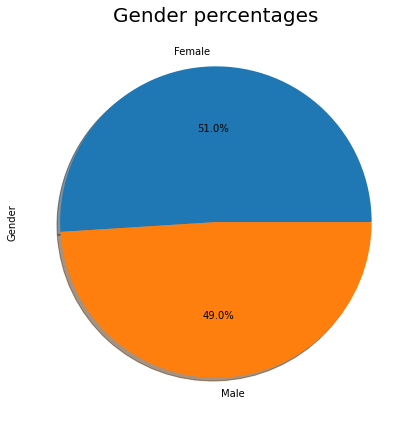

In [10]:
dataset['Gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(6,6))
plt.title('Gender percentages', fontsize = 20)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Age')

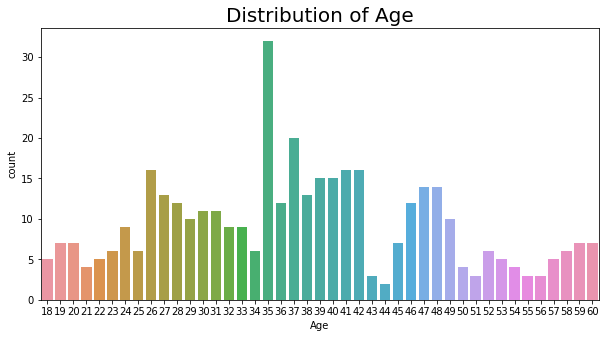

In [11]:
# checking the age of people

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(dataset['Age'])
plt.title('Distribution of Age', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Salary amongst the Customers')

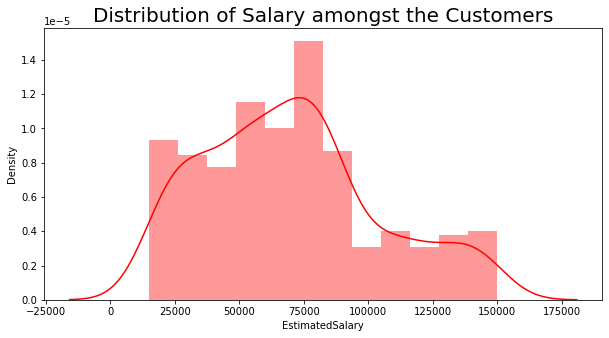

In [12]:
# distribution of salary amongst the customers

plt.rcParams['figure.figsize'] = (10, 5)
sns.distplot(dataset['EstimatedSalary'], color = 'red')
plt.title('Distribution of Salary amongst the Customers', fontsize = 20)

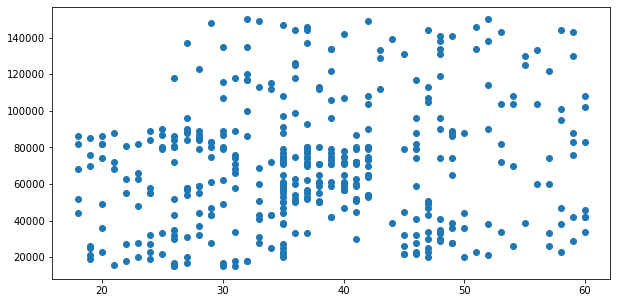

In [13]:
# plotting a scatter plot for age and purchased

plt.rcParams['figure.figsize'] = (10, 5)
plt.scatter(dataset['Age'], dataset['EstimatedSalary'])
plt.show()

# EDA_PART3.ipynb

<AxesSubplot:xlabel='Purchased'>

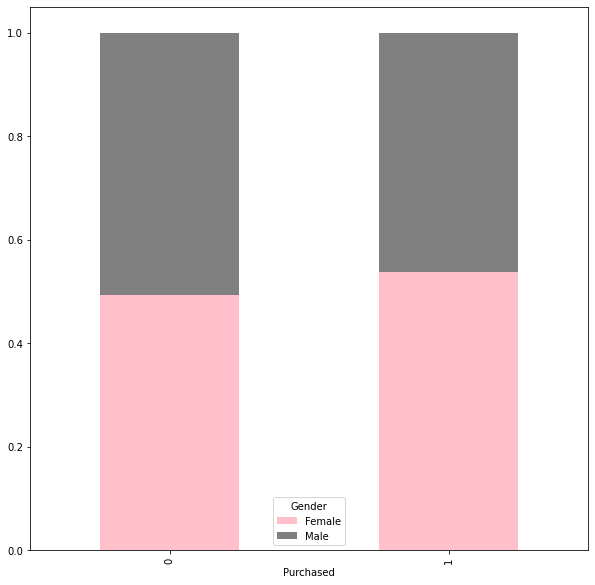

In [14]:
# column chart for looking at the relation of gender in purchased 

data = pd.crosstab(dataset['Purchased'], dataset['Gender'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 10), color = ['pink', 'grey'])

Text(0.5, 1.0, 'Estimated Salary vs Predicted Purchase by a Customer')

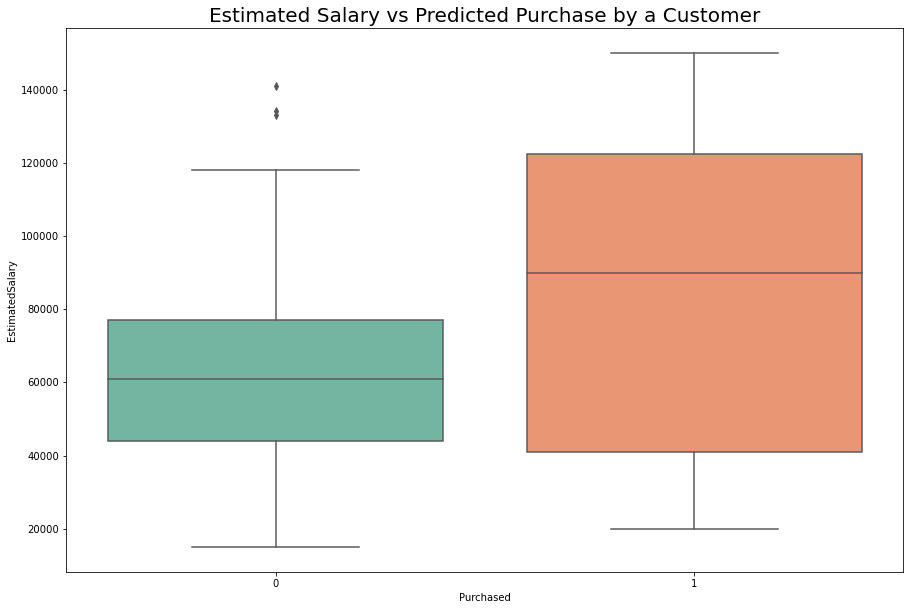

In [15]:
# box plot 

# estimated salary vs predicted

plt.rcParams['figure.figsize'] = (15, 10)
sns.boxplot(dataset['Purchased'], dataset['EstimatedSalary'], palette = 'Set2')
plt.title('Estimated Salary vs Predicted Purchase by a Customer', fontsize = 20)

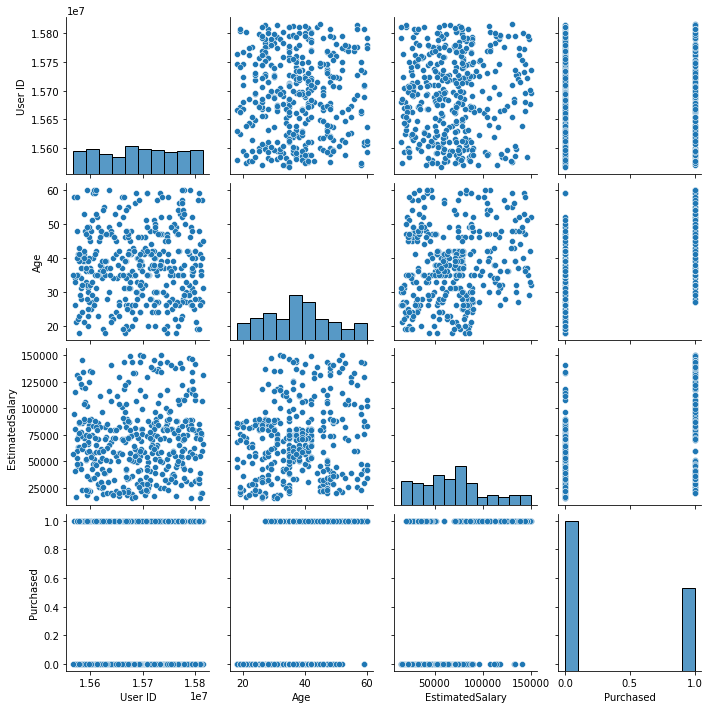

In [16]:
# plotting a pairplot for the data

sns.pairplot(dataset)

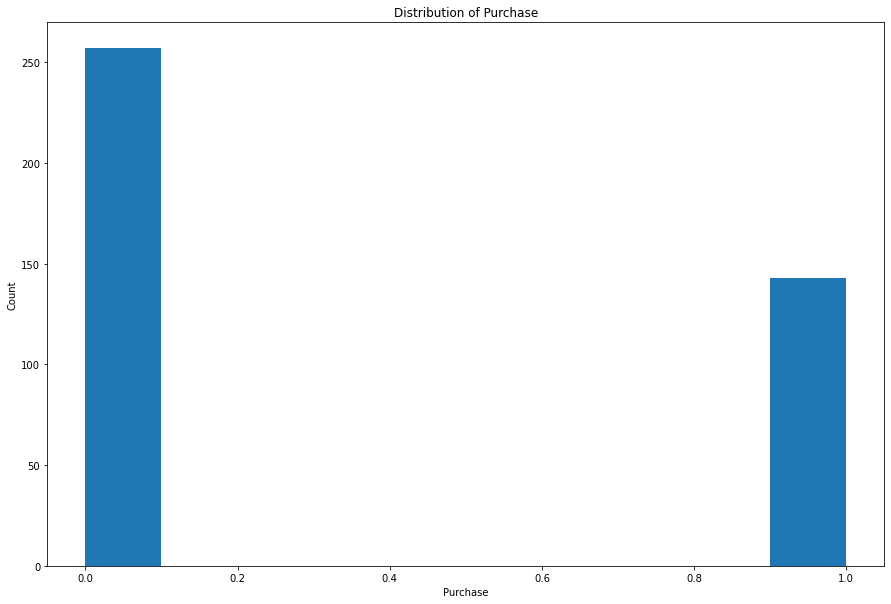

In [17]:
plt.hist(x="Purchased", data=dataset);
plt.title('Distribution of Purchase');
plt.ylabel('Count');
plt.xlabel('Purchase');

In [18]:
By this histogram we have clear idea that by the social media ads most of the are not purchased the product.

SyntaxError: invalid syntax (<ipython-input-18-c2f96dd93389>, line 1)

In [ ]:
sns.barplot(x="Purchased", y="EstimatedSalary",hue='Gender', data=dataset)



Females have higher average salary.

Females purchased more


# Model.ipynb

In [ ]:
import numpy as np # for linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

In [ ]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot = labels, fmt = '', cmap = 'Blues', cbar = False)
plt.gcf().set_size_inches(5, 5)
plt.title('Confusion Matrix Logistic Regression', fontsize = 20)
plt.show()

In [ ]:
def clf_model(model):
    clf = model
    clf.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, clf.predict(X_test).round())
    return clf, accuracy

In [ ]:
model_list = []
score_list = []

model2 = RandomForestClassifier(random_state=5)
model2.fit(X_train, y_train)
score2 = accuracy_score(y_test, model2.predict(X_test))
print("Model : RandomForest Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score2))
model_list.append('RandomForestClassifier')
score_list.append(score2)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model2.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model2.predict(X_test))))

In [ ]:
model5 = SVC(kernel = 'rbf',  random_state = 2)
model5.fit(X_train, y_train)
score5 = accuracy_score(y_test, model5.predict(X_test))
print("Model : Support vector Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score5))
model_list.append('Support vectorClassifier')
score_list.append(score5)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model5.predict(X_test))))
print('=====================================')
print('precision_Score : {:0.2f}'.format(precision_score(y_test, model5.predict(X_test))))

In [ ]:
model6 = GaussianNB()
model6.fit(X_train, y_train)
score6 = accuracy_score(y_test, model6.predict(X_test))
print("Model : GaussianNB")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score6))
model_list.append('GaussianNB')
score_list.append(score6)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model6.predict(X_test))))
print('=====================================')
print('precision_Score : {:0.2f}'.format(precision_score(y_test, model6.predict(X_test))))

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
score1 = accuracy_score(y_test, model1.predict(X_test))
print("Model : Logistics Regression")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score1))
model_list.append('Logistic_Regression')
score_list.append(score1)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model1.predict(X_test))))
print('=====================================')
print('precision_Score : {:0.2f}'.format(precision_score(y_test, model1.predict(X_test))))

In [ ]:
plt.figure(figsize=(18, 5))
sns.barplot(model_list, score_list)

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(model_list, score_list)